In [1]:
import pandas as pd
import pandlas
import os

In [2]:
input_csv = r"C:\Users\owen.foo\Downloads\Red Bull Ring w12.csv"
litedbdir = r'c:\temp\PanTLAS\temp.ssndb'
output_ssn2 = r'c:\ssn2\Red_Bull_Ring_w12.ssn2'
pathToFile = os.path.abspath(litedbdir)
output_dir = os.path.dirname(output_ssn2)

In [3]:
# Load file and inspect
df = pd.read_csv(input_csv,header = 2)
df.drop(index=0,inplace=True)
df.head()

C:\Users\owen.foo\AppData\Local\Temp\ipykernel_12136\2228468274.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,54,56,57,58,59,60,63,64,65,66,67,68,69,70,72,76,77,81,82,83,84,86,87,88,89,90,91,92,93,94,97,98,99,100,101,102,103,107,108,110,111,112,113,115,116,117,118,119,121,122,123,124,125,131,132,135,138,141,142,143,144,145,146,147,148,149,150,151,152,153,154,160,161,162,163,164,168,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,188,189,190,191,192,193,194,195,196,205,206,207,208,210,211,212,213,214,215,216,217,218,219,220,221,223,227,229,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,249,254,257,258,260,261,262,263,264,265,266,268,269,276,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,298,299,302,305,306,308,309,310,311,312,313,314,315,316,317,318,319,320,321,324,325,326,327,328,329,330,331,333,334,335,336,337,338,341,342,3

,TimeOfDay,ROLLRshockVel_2,ROLLRshockVel_3,ROLLRshockVel_0,ROLLRshockVel_1,ROLLRshockVel_4,ROLLRshockVel_5,EnergyERSBatteryPct,ChanAvgLatency,OilLevel,...,FuelLevelPct,SessionFlags,YawRate_5,YawRate_4,YawRate_1,YawRate_0,YawRate_3,YawRate_2,IsOnTrack,OilTemp
1,00:00:55.533,0.015,0.016,0.005,0.012,0.015,0.011,1.000,0.031,6.000,...,0.545,268435968.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,1.0,77.000
2,00:00:55.536,0.015,0.016,0.005,0.012,0.015,0.011,1.000,0.031,6.000,...,0.545,268435968.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,1.0,77.000
3,00:00:55.539,0.015,0.016,0.005,0.012,0.015,0.011,1.000,0.031,6.000,...,0.545,268435968.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,1.0,77.000
4,00:00:55.542,0.015,0.016,0.005,0.012,0.015,0.011,1.000,0.031,6.000,...,0.545,268435968.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,1.0,77.000
5,00:00:55.544,0.015,0.016,0.005,0.012,0.015,0.011,1.000,0.031,6.000,...,0.545,268435968.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,1.0,77.000


In [4]:
# convert index to DateTime index
df.set_index('TimeOfDay',inplace=True)
df.index = pd.to_datetime(df.index)


In [5]:
# drop the text columns and convert to float
text_cols = []
for i,value in enumerate(df.iloc[0,:]):
    try:
        float(value)
    except:
#         print(value)
        text_cols.append(i)
        
print(f'Dropping {len(text_cols)} columns')
print(df.columns[text_cols])
df = df.drop(columns=df.columns[text_cols])
df = df.astype(float)

Dropping 10 columns
Index(['SESSIONDETAIL_Circuit', 'SESSIONDETAIL_Session_Description',
       'SESSIONDETAIL_Pit_Lane_Trigger', 'SESSIONDETAIL_Car',
       'SESSIONDETAIL_Session_Number', 'SESSIONDETAIL_Session_Name',
       'SESSIONDETAIL_Race/Test', 'SESSIONDETAIL_Date_of_recording',
       'SESSIONDETAIL_Weather', 'SESSIONDETAIL_Driver'],
      dtype='object')


In [6]:
# drop columns with invalid values
na_cols = df.isna().sum()!=0
print(f'Dropping {na_cols.sum()} coulmns')
print(df.columns[na_cols])
df = df.dropna(axis=1)

Dropping 9 coulmns
Index(['SESSIONDETAIL_ECU_Serial_No.', 'SESSIONDETAIL_Note_1',
       'SESSIONDETAIL_Note_2', 'SESSIONDETAIL_Unit_Data_Source',
       'SESSIONDETAIL_Engine_Description', 'SESSIONDETAIL_Lap_Trigger_Offset',
       'SESSIONDETAIL_Extra_notes', 'SESSIONDETAIL_ECU_Version',
       'SESSIONDETAIL_Chassis_number'],
      dtype='object')


In [7]:
df.head()

,ROLLRshockVel_2,ROLLRshockVel_3,ROLLRshockVel_0,ROLLRshockVel_1,ROLLRshockVel_4,ROLLRshockVel_5,EnergyERSBatteryPct,ChanAvgLatency,OilLevel,RRtempM,...,FuelLevelPct,SessionFlags,YawRate_5,YawRate_4,YawRate_1,YawRate_0,YawRate_3,YawRate_2,IsOnTrack,OilTemp
TimeOfDay,,,,,,,,,,,,,,,,,,,,,
2023-02-14 00:00:55.533,0.015,0.016,0.005,0.012,0.015,0.011,1.0,0.031,6.0,79.986,...,0.545,268435968.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,77.0
2023-02-14 00:00:55.536,0.015,0.016,0.005,0.012,0.015,0.011,1.0,0.031,6.0,79.986,...,0.545,268435968.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,77.0
2023-02-14 00:00:55.539,0.015,0.016,0.005,0.012,0.015,0.011,1.0,0.031,6.0,79.986,...,0.545,268435968.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,77.0
2023-02-14 00:00:55.542,0.015,0.016,0.005,0.012,0.015,0.011,1.0,0.031,6.0,79.986,...,0.545,268435968.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,77.0
2023-02-14 00:00:55.544,0.015,0.016,0.005,0.012,0.015,0.011,1.0,0.031,6.0,79.986,...,0.545,268435968.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,77.0


<AxesSubplot:xlabel='TimeOfDay'>

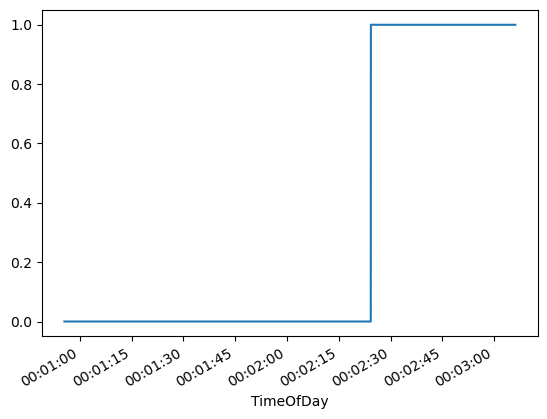

In [8]:
# inspect laps
df.Lap.plot()

In [9]:
from pandlas.SqlRace import initialise_sqlrace
initialise_sqlrace()


from pandlas.session_frame import *
#  Create new session
connectionString = rf"DbEngine=SQLite;Data Source={litedbdir};"
sessionManager = SessionManager.CreateSessionManager()
sessionKey = SessionKey.NewKey()
sessionIdentifier = os.path.basename(output_ssn2).rstrip("2").rstrip("n").rstrip("s").rstrip(".")
sessionDate = DateTime.Now
eventType = 'iRacing'
clientSession = sessionManager.CreateSession(connectionString, sessionKey, sessionIdentifier,
                                             sessionDate, eventType)
session = clientSession.Session

In [10]:
# Add lap at start of session
timestamp = df.index[0]
timestamp64 = ((timestamp.hour * 3600 + timestamp.minute * 60 + timestamp.second) * 1e9 +
         timestamp.microsecond * 1e3 + timestamp.nanosecond)
lap = df.loc[timestamp].Lap
newlap = Lap(int(timestamp64), int(lap), Byte(0), f"Lap {lap}",
         True)
session.Laps.Add(newlap)

# add the rest of the laps
for timestamp in df[df.Lap.diff()==1].index:
    timestamp64 = ((timestamp.hour * 3600 + timestamp.minute * 60 + timestamp.second) * 1e9 +
             timestamp.microsecond * 1e3 + timestamp.nanosecond)
    lap = df.loc[timestamp].Lap
    newlap = Lap(int(timestamp64), int(lap), Byte(0), f"Lap {lap}",
             True)
    session.Laps.Add(newlap)


In [11]:
df.atlas.to_ssn2(session=session)

Adding data: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 369/369 [21:18<00:00,  3.46s/it]

0


Test Dataframe size: 369 parameters each with 47014 datapoint

For 2 parameters

Version 0.1.0: 25.7 s ± 84.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)\
timestamp vectorize: 20.9 s ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each\
fully vectorized: 21 s ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For 10 parameters

Version 0.1.0: 2min 7s ± 664 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)\
timestamp vectorized: 1min 44s ± 726 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)\
fully vectorized: 1min 43s ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For full file (369 parameters)

Version 0.1.0: 26min 30s ± 1.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)\
timestamp vectorized: 22min 31s ± 6.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)\
fully vectorized: 21min 51s ± 2.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [12]:
clientSession.Close()


In [13]:
exporter = Ssn2SessionExporter()
exporter.Export(sessionKey.ToString(), litedbdir, output_dir)

In [14]:
df.shape

(47014, 369)